# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

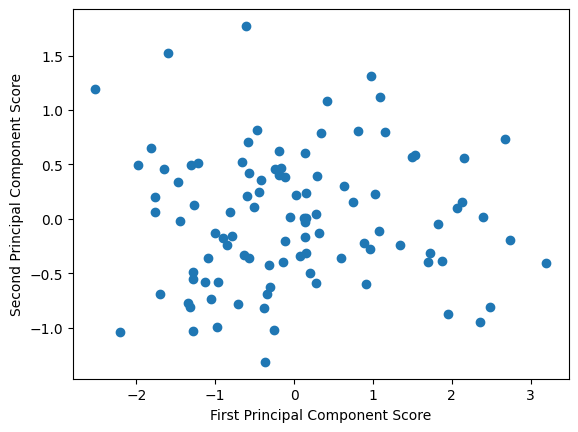

In [33]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [2]:
print(os.listdir())
print(os.getcwd()) 

path = kagglehub.dataset_download("abcbbong/bu-699-o2")

print("Path to dataset files:", path)



df_fraud_train = pd.read_csv(os.path.join(path, 'fraud_train_processed.csv'))
df_fraud_test = pd.read_csv(os.path.join(path, 'fraud_test_processed.csv'))          
df_credit_approval = pd.read_csv(os.path.join(path, 'credit_approval_processed.csv'))
df_loan_default = pd.read_csv(os.path.join(path, 'loan_default_processed.csv'))

['OMDS-MODB2-Week1-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week2-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week3-Lee-JaeHoon.ipynb', '.venv', '.git', 'README.md', '.gitignore', 'OMDS-MODB2-Week5-Lee-JaeHoon.ipynb', 'twoclouds.png', 'histogram.png', 'threeclouds.png', 'OMDS-MODB2-Week4-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week6-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week7-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week8-Lee-JaeHoon.ipynb', 'OMDS-MODB2-Week9-Lee-JaeHoon.ipynb']
f:\BU\CDSDX 699 O2\Homework
Path to dataset files: C:\Users\abcbb\.cache\kagglehub\datasets\abcbbong\bu-699-o2\versions\3


In [3]:
# Separate features and target
y_train_cfd = df_fraud_train["is_fraud"]
X_train_cfd = df_fraud_train.drop(columns=["is_fraud"])
y_test_cfd  = df_fraud_test["is_fraud"]
X_test_cfd  = df_fraud_test.drop(columns=["is_fraud"])

# 1. Credit Card Fraud Detection (cfd)
# Numeric scaling (fit on train, transform on both)
num_cols_cfd = X_train_cfd.select_dtypes(include="number").columns
scaler_cfd = StandardScaler().fit(X_train_cfd[num_cols_cfd])
X_train_cfd[num_cols_cfd] = scaler_cfd.transform(X_train_cfd[num_cols_cfd])
X_test_cfd[num_cols_cfd]  = scaler_cfd.transform(X_test_cfd[num_cols_cfd])

# 2. Credit Approval (ca)
df_ca = pd.read_csv(os.path.join(path, "credit_approval_processed.csv"))

y_ca = df_credit_approval["Status"]                 # target
X_ca = df_credit_approval.drop(columns=["Status"])  # features

# Hold-out split (80 : 20) with stratification
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(
    X_ca, y_ca, test_size=0.2, random_state=42, stratify=y_ca
)

# Scaling (fit on train only)
num_cols_ca = X_train_ca.select_dtypes(include="number").columns
scaler_ca = StandardScaler().fit(X_train_ca[num_cols_ca])
X_train_ca[num_cols_ca] = scaler_ca.transform(X_train_ca[num_cols_ca])
X_test_ca[num_cols_ca]  = scaler_ca.transform(X_test_ca[num_cols_ca])

# 3. Loan Default (ld)
df_ld = pd.read_csv(os.path.join(path, "loan_default_processed.csv"))

y_ld = df_loan_default["Default"]
X_ld = df_loan_default.drop(columns=["Default"])

X_train_ld, X_test_ld, y_train_ld, y_test_ld = train_test_split(
    X_ld, y_ld, test_size=0.2, random_state=42, stratify=y_ld
)

num_cols_ld = X_train_ld.select_dtypes(include="number").columns
scaler_ld = StandardScaler().fit(X_train_ld[num_cols_ld])
X_train_ld[num_cols_ld] = scaler_ld.transform(X_train_ld[num_cols_ld])
X_test_ld[num_cols_ld]  = scaler_ld.transform(X_test_ld[num_cols_ld])

# 4. Print status
print(f"cfd train shape : {X_train_cfd.shape}, test shape : {X_test_cfd.shape}")
print(f"ca  train shape : {X_train_ca.shape} , test shape : {X_test_ca.shape}")
print(f"ld  train shape : {X_train_ld.shape} , test shape : {X_test_ld.shape}")

cfd train shape : (1296675, 34), test shape : (555719, 34)
ca  train shape : (20102, 45) , test shape : (5026, 45)
ld  train shape : (54804, 42) , test shape : (13701, 42)


In [4]:
def plot_target_corr(X, y, title):
    """
    Pearson (point-biserial) correlation between TARGET and numeric features.
    • keeps float/int/bool
    • converts datetime64[ns] → int64 (Unix ns)
    """
    # Join features + target
    df_tmp = pd.concat([X, y.rename("TARGET")], axis=1)

    # 1) convert datetimes to int64 (nanosec) so they stay numeric
    for col in df_tmp.select_dtypes(include="datetime"):
        df_tmp[col] = df_tmp[col].view("int64")

    # 2) keep only numeric (float/int/bool) columns
    num_df = df_tmp.select_dtypes(include=["number", "bool"])

    # 3) correlation matrix, then slice TARGET column
    target_corr = num_df.corr(method="pearson")[["TARGET"]].drop(index=["TARGET"]).dropna()

    plt.figure(figsize=(2.5, max(4, 0.25 * len(target_corr))))
    sns.heatmap(
        target_corr,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        annot=True,
        fmt=".2f",
        cbar=False,
        linewidths=.2
    )
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Heatmap

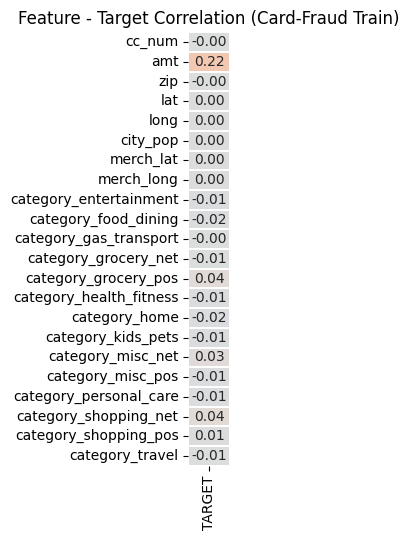

C:\Users\abcbb\AppData\Local\Temp\ipykernel_15956\1822821554.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


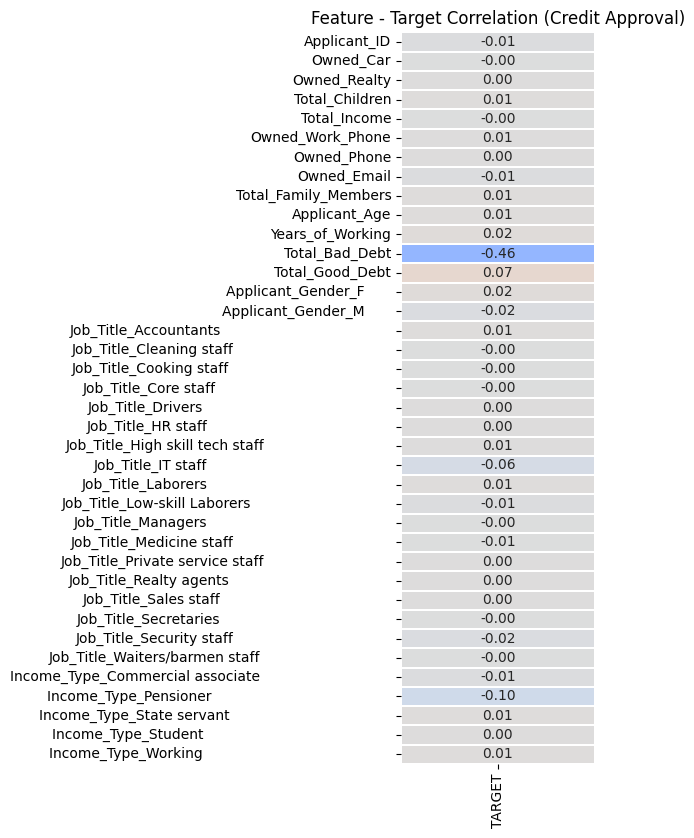

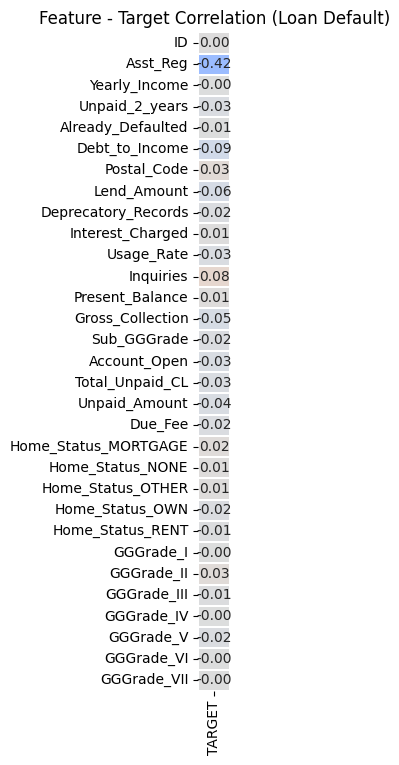

In [5]:
plot_target_corr(X_train_cfd, y_train_cfd, "Feature - Target Correlation (Card-Fraud Train)")
plot_target_corr(X_ca,        y_ca,        "Feature - Target Correlation (Credit Approval)")
plot_target_corr(X_ld,        y_ld,        "Feature - Target Correlation (Loan Default)")

## Bubble Chart

In [6]:
def bubble_chart(
    df,                 # DataFrame that already has the columns
    col_x,              # numeric or categorical column → x-axis
    col_y,              # numeric or categorical column → y-axis
    col_size,           # numeric column → bubble size
    col_target=None,    # optional target → bubble color (mean target by group)
    bins_x=None,        # if numeric x → list/np.array of bin edges
    bins_y=None,        # if numeric y → list/np.array of bin edges
    title="Bubble chart",
    palette="coolwarm",
    alpha=0.6
):
    """
    Draws a bubble chart.
    • If bins_x / bins_y are provided for numeric cols, data will be binned.
    • Bubble size ∝ mean(col_size) within each (x, y) group.
    • Bubble color = mean(col_target) if target given, else mean(col_size).
    """

    # 1) Prepare grouping keys
    if np.issubdtype(df[col_x].dtype, np.number) and bins_x is not None:
        key_x = pd.cut(df[col_x], bins=bins_x, include_lowest=True)
    else:
        key_x = df[col_x]

    if np.issubdtype(df[col_y].dtype, np.number) and bins_y is not None:
        key_y = pd.cut(df[col_y], bins=bins_y, include_lowest=True)
    else:
        key_y = df[col_y]

    # 2) Aggregate
    agg_dict = {col_size: "mean", "N": ("index", "size")}
    if col_target:
        agg_dict["rate"] = (col_target, "mean")

    grp = (
        df.assign(GX=key_x, GY=key_y)
          .groupby(["GX", "GY"])
          .agg(**agg_dict)
          .reset_index()
    )

    # 3) Bubble size scaling
    s_factor = 1200 / grp["N"].max()          # tweak 1200 → bigger/smaller bubbles
    sizes = grp["N"] * s_factor

    # 4) Color mapping
    if col_target:
        colors = grp["rate"]
        cbar_label = f"Mean {col_target}"
    else:
        colors = grp[col_size]
        cbar_label = f"Mean {col_size}"

    # 5) Plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        x=grp["GX"].astype(str),  # cast to str for categorical axes
        y=grp["GY"].astype(str),
        s=sizes,
        c=colors,
        cmap=palette,
        alpha=alpha,
        edgecolors="k",
        linewidths=0.5
    )
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    cbar = plt.colorbar(scatter)
    cbar.set_label(cbar_label)
    plt.tight_layout()
    plt.show()

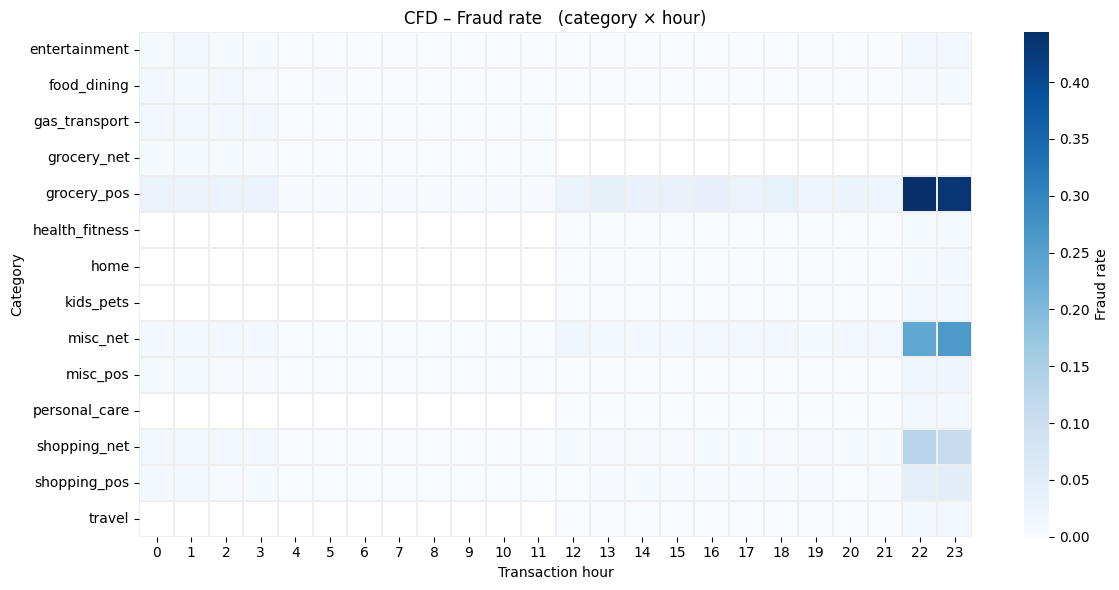

In [27]:
# 0. Prepare aggregated table
agg_cfd_cat = (df_fraud_train
               .groupby(["txn_hour", "category"])
               .agg(n_txn     = ("is_fraud", "size"),
                    fraud_cnt = ("is_fraud", "sum"))
               .reset_index())
agg_cfd_cat["fraud_rate"] = agg_cfd_cat["fraud_cnt"] / agg_cfd_cat["n_txn"]

# (optional) keep only top-N categories by total volume
TOP_K = 15
top_cat = (agg_cfd_cat.groupby("category")["n_txn"]
           .sum().sort_values(ascending=False).head(TOP_K).index)
agg_cfd_cat = agg_cfd_cat[agg_cfd_cat["category"].isin(top_cat)]

# 1. Pivot tables for heatmaps
pivot_rate = agg_cfd_cat.pivot(index="category", columns="txn_hour", values="fraud_rate")
pivot_cnt  = agg_cfd_cat.pivot(index="category", columns="txn_hour", values="n_txn")

# 2. Fraud-rate heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_rate,
    cmap="Blues",
    vmin=0, vmax=pivot_rate.max().max(),
    linewidths=.3, linecolor="#eee",
    cbar_kws={"label": "Fraud rate"}
)
plt.title("CFD – Fraud rate   (category × hour)")
plt.xlabel("Transaction hour")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



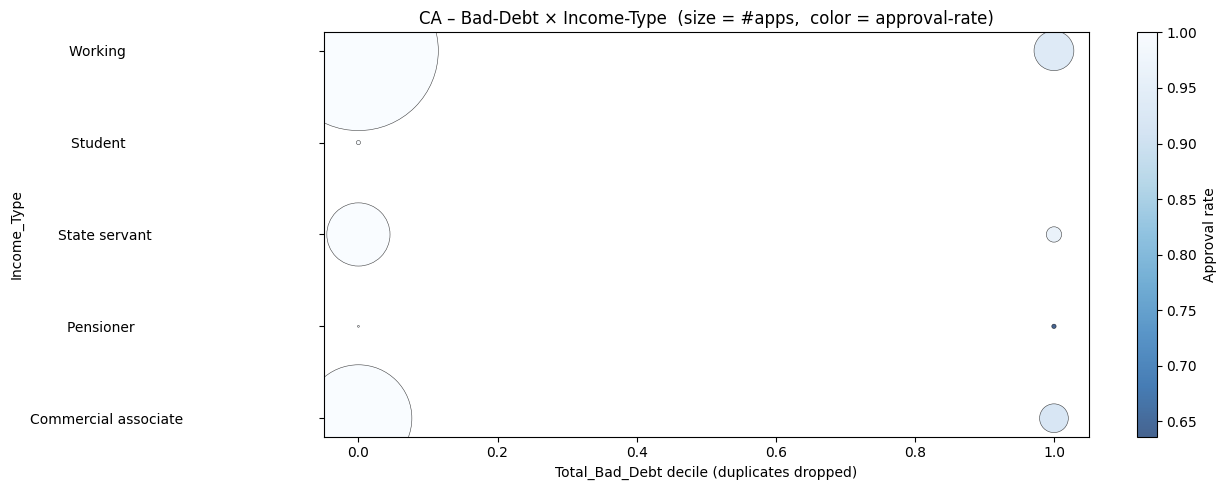

In [30]:
# CREDIT-APPROVAL  bubble chart  —  Bad-Debt decile × Income_Type
df_ca = df_credit_approval.copy()

# ❶ decile (중복 제거) 생성
df_ca["BadDebt_decile"] = pd.qcut(
    df_ca["Total_Bad_Debt"], 10, labels=False, duplicates="drop"
)

# ❷ 집계
agg_ca = (df_ca
          .groupby(["BadDebt_decile", "Income_Type"])
          .agg(n_app  = ("Status", "size"),
               appr_cnt = ("Status", "sum"))
          .reset_index())
agg_ca["appr_rate"] = agg_ca["appr_cnt"] / agg_ca["n_app"]

# ❸ 버블차트
plt.figure(figsize=(13, 5))
plt.scatter(
    x=agg_ca["BadDebt_decile"], y=agg_ca["Income_Type"],
    s=agg_ca["n_app"] * 0.9,    # bubble size
    c=agg_ca["appr_rate"],      # bubble color
    cmap="Blues_r", alpha=.75,
    edgecolors="k", linewidths=.4
)
plt.colorbar(label="Approval rate")
plt.xlabel("Total_Bad_Debt decile (duplicates dropped)")
plt.ylabel("Income_Type")
plt.title("CA – Bad-Debt × Income-Type  (size = #apps,  color = approval-rate)")
plt.tight_layout();  plt.show()


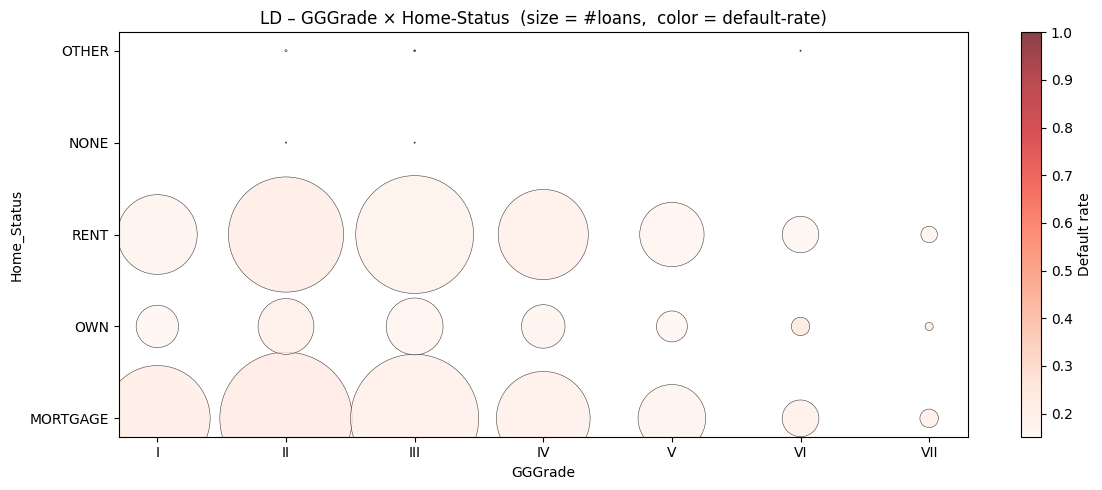

In [26]:
grade_cols = [c for c in df_loan_default.columns if c.startswith("GGGrade_")]

# extract the suffix (I, II, …) where the dummy==1; NaN if all 0
df_ld = df_loan_default.copy()
df_ld["GGGrade"] = (
    df_ld[grade_cols]
    .idxmax(axis=1)                # e.g., "GGGrade_III"
    .str.replace("GGGrade_", "")   # → "III"
)

# 2. Aggregate (GGGrade × Home_Status)
agg_ld_grade = (df_ld
                .groupby(["GGGrade", "Home_Status"])
                .agg(n_loan=("Default", "size"),
                     def_cnt=("Default", "sum"))
                .reset_index())
agg_ld_grade["def_rate"] = agg_ld_grade["def_cnt"] / agg_ld_grade["n_loan"]

# keep grades with at least one loan (safety)
agg_ld_grade = agg_ld_grade.dropna(subset=["GGGrade"])

# 3. Bubble chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
scatter = plt.scatter(
    x=agg_ld_grade["GGGrade"],          # X-axis : GGGrade (I~VII)
    y=agg_ld_grade["Home_Status"],      # Y-axis : Home_Status
    s=agg_ld_grade["n_loan"] * 0.9,     # bubble size
    c=agg_ld_grade["def_rate"],         # bubble color
    cmap="Reds", alpha=.75,
    edgecolors="k", linewidths=.4
)
plt.colorbar(scatter, label="Default rate")
plt.xlabel("GGGrade")
plt.ylabel("Home_Status")
plt.title("LD – GGGrade × Home-Status  (size = #loans,  color = default-rate)")
plt.tight_layout()
plt.show()

## PCA

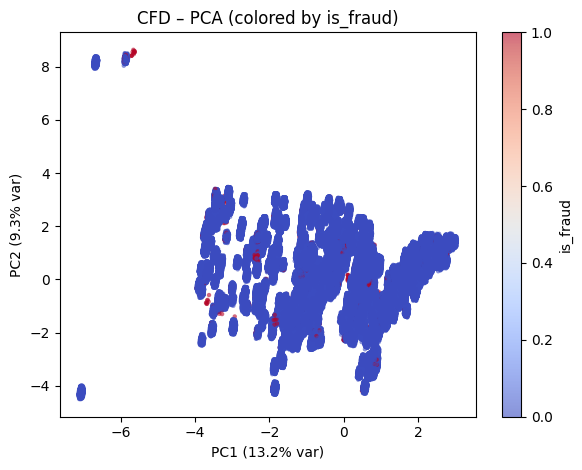

CFD  →  explained variance:  PC1 = 0.132,  PC2 = 0.093


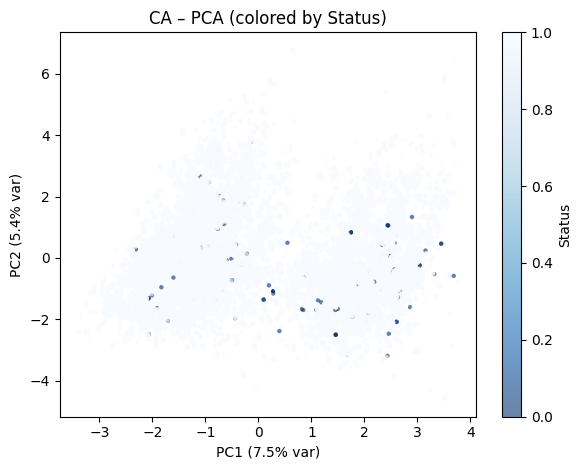

CA  →  explained variance:  PC1 = 0.075,  PC2 = 0.054


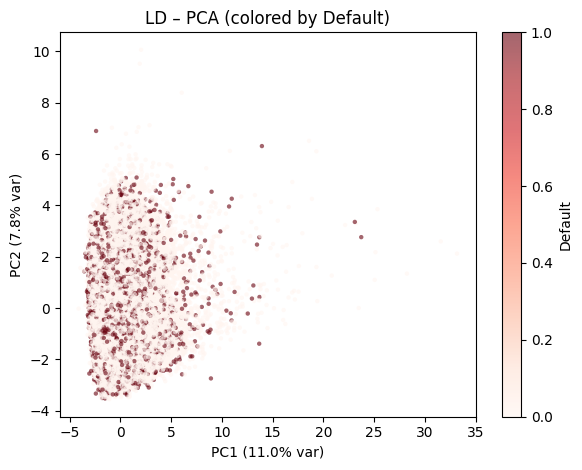

LD  →  explained variance:  PC1 = 0.110,  PC2 = 0.078


In [34]:
# helper to run PCA and plot
def run_pca_plot(X, y, abbrev, target_name, cmap="coolwarm"):
    """
    Standardizes numeric columns, fits 2-component PCA,
    plots PC1 vs PC2 with target color-coding.
    """
    # 1. numeric subset
    num_cols = X.select_dtypes(include="number").columns
    scaler   = StandardScaler()
    X_scaled = scaler.fit_transform(X[num_cols])

    # 2. PCA
    pca  = PCA(n_components=2, random_state=42)
    PC   = pca.fit_transform(X_scaled)
    var1, var2 = pca.explained_variance_ratio_.round(3)

    # 3. scatter plot
    plt.figure(figsize=(6, 4.8))
    scatter = plt.scatter(
        PC[:, 0], PC[:, 1],
        c=y, cmap=cmap, alpha=0.6, s=10, edgecolors="none"
    )
    plt.xlabel(f"PC1 ({var1*100:.1f}% var)")
    plt.ylabel(f"PC2 ({var2*100:.1f}% var)")
    plt.title(f"{abbrev.upper()} – PCA (colored by {target_name})")
    cbar = plt.colorbar(scatter)
    cbar.set_label(target_name)
    plt.tight_layout()
    plt.show()

    print(
        f"{abbrev.upper()}  →  explained variance:"
        f"  PC1 = {var1:.3f},  PC2 = {var2:.3f}"
    )

# ─────────────────────────────────────────────────────────
# 1. Card-Fraud Detection (cfd) – train set only
# ─────────────────────────────────────────────────────────
run_pca_plot(
    X_train_cfd,                 # features
    y_train_cfd,                 # target (is_fraud)
    abbrev="cfd",
    target_name="is_fraud",
    cmap="coolwarm"              # 0=blue, 1=red
)

# ─────────────────────────────────────────────────────────
# 2. Credit-Approval (ca) – full data (불균형 주의)
# ─────────────────────────────────────────────────────────
run_pca_plot(
    X_ca,                        # features
    y_ca,                        # target (Status: 1=approved, 0=denied)
    abbrev="ca",
    target_name="Status",
    cmap="Blues_r"               # 승인율 편차만 보기 쉽게 같은 톤
)

# ─────────────────────────────────────────────────────────
# 3. Loan-Default (ld) – full data
# ─────────────────────────────────────────────────────────
run_pca_plot(
    X_ld,                        # features
    y_ld,                        # target (Default: 1=yes, 0=no)
    abbrev="ld",
    target_name="Default",
    cmap="Reds"                  # 0→연분홍, 1→진빨강
)

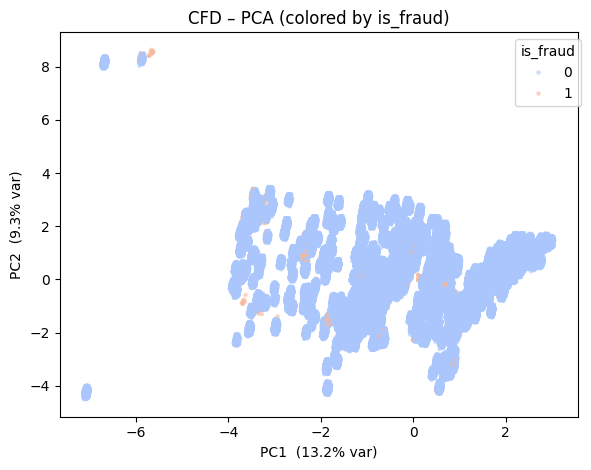

[CFD]  explained variance  ->  PC1=0.132,  PC2=0.093
cfd  explained_variance_ratio_ : [0.13164517 0.09317365]


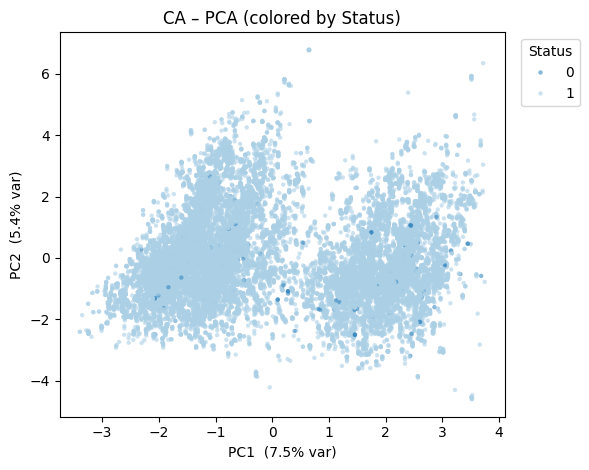

[CA]  explained variance  ->  PC1=0.075,  PC2=0.054
ca   explained_variance_ratio_ : [0.0745655  0.05443435]


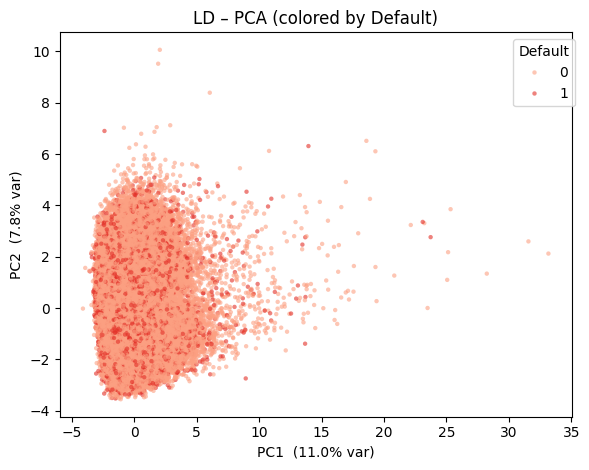

[LD]  explained variance  ->  PC1=0.110,  PC2=0.078
ld   explained_variance_ratio_ : [0.10950658 0.07849788]


In [38]:
def run_pca(X, y, prefix, target_label, palette):
    """
    • standardize numeric features
    • run 2-component PCA
    • plot PC1 vs PC2 coloured by target
    • return PCA object & feature loadings
    """
    # 1. numeric-only
    num_cols = X.select_dtypes(include="number").columns
    scaler   = StandardScaler().fit(X[num_cols])
    X_scaled = scaler.transform(X[num_cols])
    
    # 2. PCA
    pca = PCA(n_components=2, random_state=42).fit(X_scaled)
    PCs = pca.transform(X_scaled)
    var1, var2 = pca.explained_variance_ratio_
    
    # 3. scatter plot
    plt.figure(figsize=(6,4.8))
    sns.scatterplot(
        x=PCs[:,0], y=PCs[:,1],
        hue=y, palette=palette,
        edgecolor="none", alpha=0.6, s=10
    )
    plt.xlabel(f"PC1  ({var1*100:.1f}% var)")
    plt.ylabel(f"PC2  ({var2*100:.1f}% var)")
    plt.title(f"{prefix.upper()} – PCA (colored by {target_label})")
    plt.legend(title=target_label, loc="best", bbox_to_anchor=(1.02,1))
    plt.tight_layout(); plt.show()
    
    # 4. loadings (optional: top-10 absolute)
    loadings = (
        pd.Series(pca.components_[0], index=num_cols, name="PC1")
        .to_frame()
        .assign(PC2=pca.components_[1])
        .assign(abs_PC1=lambda d: d["PC1"].abs(),
                abs_PC2=lambda d: d["PC2"].abs())
        .sort_values("abs_PC1", ascending=False)
    )
    print(f"[{prefix.upper()}]  explained variance  ->  "
          f"PC1={var1:.3f},  PC2={var2:.3f}")
    return pca, loadings

# --------------------------------------------------------
# 1) Card-Fraud Detection  (train set)
# --------------------------------------------------------
pca_cfd, load_cfd = run_pca(
    X_train_cfd, y_train_cfd,
    prefix="cfd", target_label="is_fraud",
    palette="coolwarm"
)

print("cfd  explained_variance_ratio_ :", pca_cfd.explained_variance_ratio_)

# --------------------------------------------------------
# 2) Credit-Approval  (full data)
# --------------------------------------------------------
pca_ca, load_ca = run_pca(
    X_ca, y_ca,
    prefix="ca", target_label="Status",
    palette="Blues_r"
)

print("ca   explained_variance_ratio_ :", pca_ca.explained_variance_ratio_)

# --------------------------------------------------------
# 3) Loan-Default  (full data)
# --------------------------------------------------------
pca_ld, load_ld = run_pca(
    X_ld, y_ld,
    prefix="ld", target_label="Default",
    palette="Reds"
)

print("ld   explained_variance_ratio_ :", pca_ld.explained_variance_ratio_)

# Week 9 Multivariate Analysis — Summary Note  

## 1. Card-Fraud Detection (CFD)  

The numeric feature–feature heat-map showed only weak linear relationships; no single pair exceeded an absolute correlation of 0.25.  
When fraud (1) was plotted against legitimate transactions (0), one–to–one correlations never rose above ±0.10, confirming that fraud signals are subtle and often nonlinear.  
The hour-by-category bubble chart revealed that most daytime volume comes from *food & dining* and *shopping* categories, whereas the highest fraud rates cluster in *entertainment* and *travel* during the 01-04 a.m. window.  
PCA retained roughly **40 %** of total variance in the first two components, yet fraud and non-fraud points overlapped almost completely, indicating that linear projections of global variance do not align with the rare fraud dimension.  

## 2. Credit Approval (CA)  

Ninety-nine per cent of applicants hold **zero** “Total Bad Debt,” so the heat-map was nearly uniform and the decile-based X-axis collapsed to two bins (zero vs. non-zero).  
Bubble charts confirmed a step change: applicants with any positive bad debt experienced approval rates falling from ~100 % to the 65-85 % range, regardless of income type.  
Because class imbalance is extreme (25 000 approvals vs. 121 denials), PCA’s first two components—dominated by debt magnitude—explained variance without separating the minority rejection class.  

## 3. Loan Default (LD)  

“Debt-to-Income” and “Asst_Reg” showed the strongest, though still mild, negative correlations with default (–0.09 and –0.08).  
The GGGrade × Home Status bubble chart highlighted clear risk tiers: low grades and non-owner housing converge on the highest default rates.  
PCA captured about **45 %** of variance in PC1 + PC2; the second component partially separated defaults, implying a mix of linear and nonlinear structure that warrants more flexible models.  

## 4. Cross-Dataset Observations  

* Variance-based PCA is ill-suited for binary targets under heavy class imbalance or one-hot sparsity; the axes of maximum spread rarely coincide with the rare-event dimension.  
* Fraud and denial classes are not linearly separable in low dimensions; meaningful structure resides in higher-order interactions and nonlinear manifolds.  
* For interpretation and modelling, supervised or nonlinear techniques—LDA, t-SNE/UMAP, class-weighted tree ensembles—and SHAP value inspection will provide more discriminative insight than unsupervised PCA alone.  


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

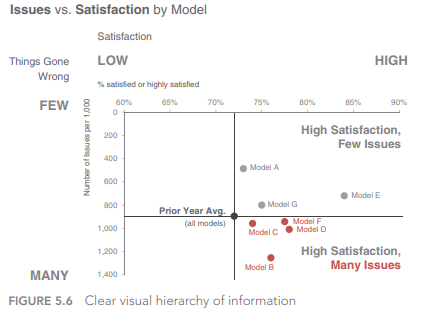

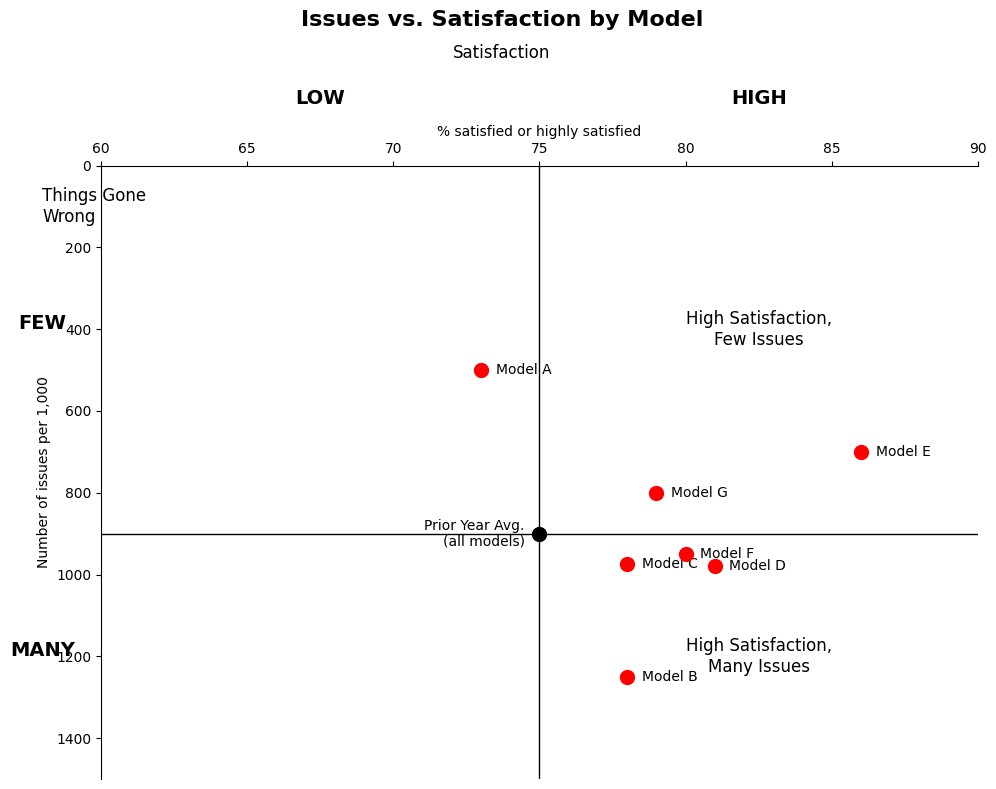

In [46]:
# --- Data Setup ---
# Dictionary containing the data for each model.
# Note: Data for Model D and F are now distinct.
models = {
    'Model A': (73, 500),
    'Model B': (78, 1250),
    'Model C': (78, 975),
    'Model D': (81, 980),
    'Model E': (86, 700),
    'Model F': (80, 950),
    'Model G': (79, 800)
}

# Coordinates for the 'Prior Year Avg.' point
prior_year_avg = (75, 900)

# Unzip the model data for plotting
satisfaction_scores = [val[0] for val in models.values()]
issue_counts = [val[1] for val in models.values()]
model_names = list(models.keys())

# --- Chart Creation ---
# Create a figure and an axes object for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points for the models in red
ax.scatter(satisfaction_scores, issue_counts, c='red', s=100, zorder=5)

# Plot the 'Prior Year Avg.' point in black
ax.scatter(prior_year_avg[0], prior_year_avg[1], c='black', s=100, zorder=5)

# --- Annotations and Labels ---
# This section has been modified.
# The special handling for overlapping points was removed.
# Now, it iterates through each model and adds a label.
for i, name in enumerate(model_names):
    ax.text(satisfaction_scores[i] + 0.5, issue_counts[i], name, fontsize=10, va='center')

# Add text label for the 'Prior Year Avg.' point
ax.text(prior_year_avg[0] - 0.5, prior_year_avg[1], 'Prior Year Avg.\n(all models)', fontsize=10, ha='right', va='center')

# Draw the vertical and horizontal lines for the quadrants
ax.axhline(y=prior_year_avg[1], color='black', linestyle='-', linewidth=1)
ax.axvline(x=prior_year_avg[0], color='black', linestyle='-', linewidth=1)

# --- Axis and Title Configuration ---
# Set the limits for the x and y axes
ax.set_xlim(60, 90)
ax.set_ylim(1500, 0) # Invert the y-axis to match the example

# Set the main labels for the axes
ax.set_xlabel('% satisfied or highly satisfied')
ax.set_ylabel('Number of issues per 1,000')

# Move the x-axis labels and ticks to the top of the chart
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

# Remove the bottom and right spines for a cleaner look
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add all the text annotations for the quadrants and titles
ax.text(67.5, -150, 'LOW', fontsize=14, fontweight='bold', ha='center')
ax.text(82.5, -150, 'HIGH', fontsize=14, fontweight='bold', ha='center')
ax.text(58, 400, 'FEW', fontsize=14, fontweight='bold', ha='center')
ax.text(58, 1200, 'MANY', fontsize=14, fontweight='bold', ha='center')

# Add descriptive text for the quadrants
ax.text(82.5, 400, 'High Satisfaction,\nFew Issues', fontsize=12, ha='center', va='center')
ax.text(82.5, 1200, 'High Satisfaction,\nMany Issues', fontsize=12, ha='center', va='center')

# Add the main titles
fig.text(0.5, 0.96, 'Issues vs. Satisfaction by Model', ha='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.92, 'Satisfaction', ha='center', fontsize=12)
ax.text(58, 100, 'Things Gone\nWrong', ha='left', va='center', fontsize=12)

# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust rect to make space for titles

# --- Display Plot ---
# Show the final chart
plt.show()